# Computational Methods for Finance - Coursework

Libraries are imported in python and renamed for easy use.

In [545]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import scipy.stats as si
import os
from mpl_toolkits.mplot3d import Axes3D

### Downloading data via Yahoo Finance

Data of one year for the stock Netflix is downloaded using the ticker symbol 'NFLX' and saved in the variable initial_data.

In [489]:
initial_data = yf.download("NFLX", start="2020-12-01", end="2021-12-01")

[*********************100%***********************]  1 of 1 completed


Data downloaded is checked by selecting the first five rows and last five rows using .head() and .tail() method.

In [490]:
initial_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-01,492.339996,509.470001,491.980011,504.579987,504.579987,5052700
2020-12-02,501.619995,506.799988,493.500000,503.380005,503.380005,3028400
2020-12-03,502.989990,508.769989,496.040009,497.519989,497.519989,2826100
2020-12-04,497.500000,504.500000,493.640015,498.309998,498.309998,3666200
2020-12-07,500.010010,517.760010,497.769989,515.780029,515.780029,4289300


In [491]:
initial_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-23,658.179993,666.429993,646.049988,654.059998,654.059998,2320200
2021-11-24,658.010010,661.440002,651.099976,658.289978,658.289978,1867300
2021-11-26,675.000000,676.409973,660.669983,665.640015,665.640015,2872500
2021-11-29,663.200012,667.989990,658.289978,663.840027,663.840027,2529400
2021-11-30,668.200012,675.380005,640.010010,641.900024,641.900024,5608900


The first five rows of the 'Adj Close' column is shown with the help of the .head() method.

In [492]:
initial_data['Adj Close'].head()

Date
2020-12-01    504.579987
2020-12-02    503.380005
2020-12-03    497.519989
2020-12-04    498.309998
2020-12-07    515.780029
Name: Adj Close, dtype: float64

All of the data of 'Adj Close' column that represents the adjusted closing price of the stock Netflix is saved in the variable data and rounded upto 2 decimal places.

In [493]:
data =  initial_data['Adj Close'].round(2)

The information saved in the data variable is represented by selecting the first five rows and last five rows. This is done to check whether the data saved is correct or not.

In [494]:
data.head()

Date
2020-12-01    504.58
2020-12-02    503.38
2020-12-03    497.52
2020-12-04    498.31
2020-12-07    515.78
Name: Adj Close, dtype: float64

In [495]:
data.tail()

Date
2021-11-23    654.06
2021-11-24    658.29
2021-11-26    665.64
2021-11-29    663.84
2021-11-30    641.90
Name: Adj Close, dtype: float64

The adjusted closing price of the stock for Netflix from 2020-12-01 to 2021-12-01 is plotted with the help of .plot() method. X-axis denotes the Date of the stock whereas y-axis is denotes the adjusted closing price of the stock.

array([<AxesSubplot:xlabel='Date'>], dtype=object)

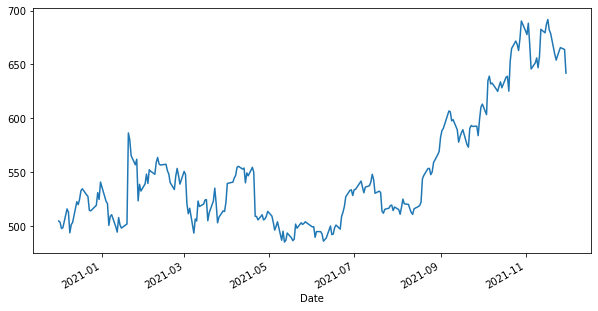

In [496]:
data.plot(figsize=(10, 5), subplots=True) 

### Summary Statistics

Data description is calculated with the help of .describe() method and rounded up to 2 decimal places.

In [497]:
data.describe().round(2)

count    252.00
mean     550.19
std       54.85
min      484.98
25%      510.00
50%      532.96
75%      576.01
max      691.69
Name: Adj Close, dtype: float64

### Changes over Time

Changes in time series over time can be calculated through absolute differences, percentage changes, and logarithmic (log) returns. Logarithmic returns is used in this report to show changes as they are more preferred in financial context.

Log returns is denoted by rets. Data saved in the rets variable is checked with the help of .head() method and rounded up to 4 decimal places with the help of .round(4) method.

In [498]:
rets = np.log(data / data.shift(1)) 
rets.head().round(4)

Date
2020-12-01       NaN
2020-12-02   -0.0024
2020-12-03   -0.0117
2020-12-04    0.0016
2020-12-07    0.0345
Name: Adj Close, dtype: float64

Graph of cumulative sum for log return using comtinuous compounding is plotted.

<AxesSubplot:xlabel='Date'>

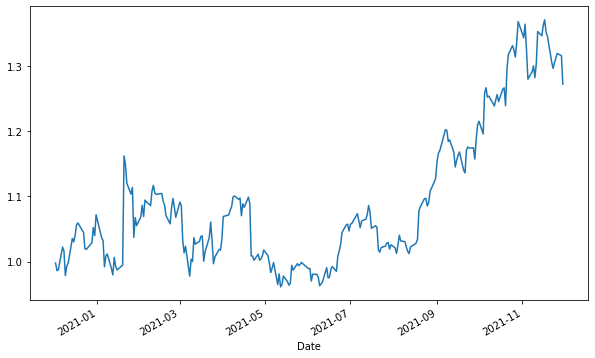

In [499]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6)) 

### Rolling Statistics

egrhftjfg

In [500]:
NFLX_data['min'] = data.rolling(window=10).min()
NFLX_data['mean'] = data.rolling(window=10).mean()
NFLX_data['std'] = data.rolling(window=10).std()
NFLX_data['median'] = data.rolling(window=10).median()
NFLX_data['max'] = data.rolling(window=10).max()
NFLX_data['ewma'] = data.ewm(halflife=0.5, min_periods=window).mean() 
NFLX_data.dropna().head()

,NFLX,min,mean,std,median,max,ewma,SMA1,SMA2,positions
Date,,,,,,,,,,
2021-02-26,538.849976,533.78,547.247,7.782335,547.460,557.28,541.078640,548.131500,530.071334,1
2021-03-01,550.640015,533.78,546.659,7.204544,547.460,557.28,548.249660,549.044000,530.839001,1
2021-03-02,547.820007,533.78,545.713,6.207005,547.260,553.41,547.927415,549.483002,531.579668,1
2021-03-03,520.700012,520.70,542.649,9.700219,546.425,553.41,527.506854,548.110004,531.966001,1
2021-03-04,511.290009,511.29,538.956,13.592550,543.185,553.41,515.344213,546.702003,532.182335,1


<AxesSubplot:xlabel='Date'>

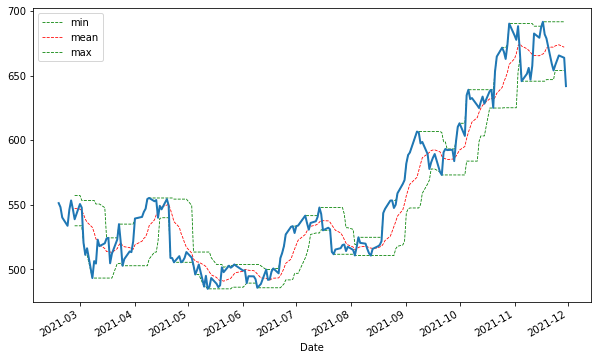

In [501]:
ax = NFLX_data[['min', 'mean', 'max']].iloc[-200:].plot(figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8)
data.iloc[-200:].plot(ax=ax, lw=2.0)

In [502]:
NFLX_data['SMA1'] = data.rolling(window=20).mean()
NFLX_data['SMA2'] = data.rolling(window=60).mean()
NFLX_data[[sym,'SMA1', 'SMA2']].tail()

,NFLX,SMA1,SMA2
Date,,,
2021-11-22,659.200012,671.5040,629.376833
2021-11-23,654.059998,670.7810,630.841500
2021-11-24,658.289978,670.5495,632.326500
2021-11-26,665.640015,670.1290,633.719333
2021-11-29,663.840027,668.8055,634.974167


<AxesSubplot:xlabel='Date'>

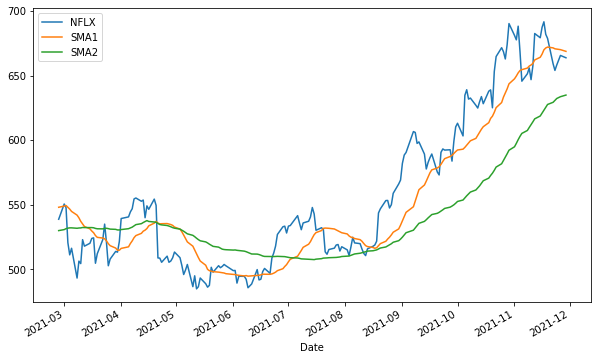

In [503]:
NFLX_data[[sym,'SMA1', 'SMA2']].plot(figsize=(10, 6))

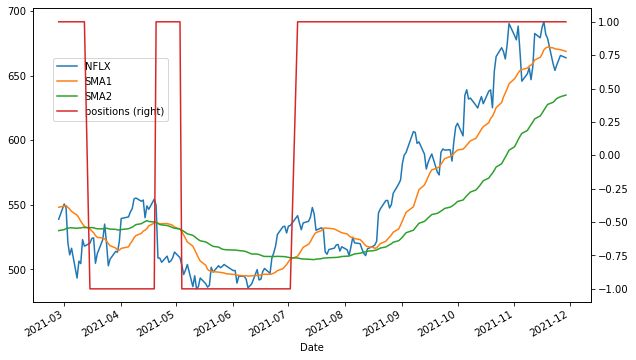

In [504]:
NFLX_data.dropna(inplace=True)
NFLX_data['positions'] = np.where(NFLX_data['SMA1'] > NFLX_data['SMA2'],1,-1)
ax = NFLX_data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

### Volatility

Annualised volatility is calculated by taking standard deviation of daily log returns multiplied by square root of 252. log_ret denotes logarithmic returns of the stock whereas vol represents the volatility of the stock for the whole year.

In [505]:
log_ret = np.log(data/data.shift(1))

In [507]:
vol = np.sqrt(252)*log_ret.std()
print("The annualised volatility is",round(vol*100,2),"%.") 

The annualised volatility is 31.82 %.


## Pricing of the option using Binomial Tree (CRR Tree)

### Data Input

In [508]:
S0 = data[-1]        # spot stock price
K = 660.00           # strike price
T = 1.0              # time to maturity 
r = 0.0134           # risk free rate (10 years) 
sig = 0.3182         # diffusion coefficient or volatility annualised
N = 3                # number of periods or number of time steps  
payoff = "put"       # payoff 

### Step 1: Create the binomial price tree

In [509]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor 

In [510]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
   for i in range(z):
       S[i, t] = S[i, t-1] * u
       S[i+1, t] = S[i, t-1] * d
   z += 1

In [511]:
S

array([[ 641.9       ,  771.35243555,  926.91163707, 1113.84257485],
       [   0.        ,  534.1729552 ,  641.9       ,  771.35243555],
       [   0.        ,    0.        ,  444.52523145,  534.1729552 ],
       [   0.        ,    0.        ,    0.        ,  369.9226617 ]])

In [512]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.4663161029878195

### Step 2: Find option value at each final node

In [513]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
   V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
   V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[  0.       ,   0.       ,   0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , 125.8270448],
       [  0.       ,   0.       ,   0.       , 290.0773383]])

### Step 3: Find European option value at earlier nodes

In [514]:
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[ 92.97373515,  35.51914452,   0.        ,   0.        ],
       [  0.        , 143.95562252,  66.85259149,   0.        ],
       [  0.        ,   0.        , 212.53334263, 125.8270448 ],
       [  0.        ,   0.        ,   0.        , 290.0773383 ]])

In [516]:
print('European ' + payoff,'$'+ str( V[0,0]))

European put $92.9737351467198


### Pricing of the option using Monte Carlo Simulation

### Data Input 

In [517]:
S0 = data[-1]            # spot stock price
K =  660.00             # strike price
T = 1.0                 # time to maturity
r = 0.0134              # risk free rate
sigma = 0.3182          # diffusion coefficient or volatility annualised

S[t] is today's price, S[t-1] is yesterday's price, random number is denoted by rn, dt change,p is time steps, number of times the simulation is run. 

In [518]:
def mcs_simulation_np(p):
    M = p                                   
    I = p 
    dt = T / M                              
    S = np.zeros((M + 1, I))                
    S[0] = S0                               
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

Simulating 10000 times and creating a 10000 by 10000 matrix.

In [519]:
S = mcs_simulation_np(10000)

In [520]:
S = np.transpose(S)
S

array([[641.9       , 640.74868887, 642.68096963, ..., 882.68011134,
        882.44011117, 881.55134673],
       [641.9       , 641.81030175, 645.49774379, ..., 687.13249801,
        688.48086849, 686.14886299],
       [641.9       , 640.54432745, 637.18894386, ..., 755.15922599,
        755.14855516, 757.66022214],
       ...,
       [641.9       , 646.36683334, 645.32544148, ..., 495.34619296,
        497.82110364, 499.48050301],
       [641.9       , 641.0691752 , 639.67662586, ..., 826.99982138,
        824.54909196, 822.73272518],
       [641.9       , 640.32372371, 638.73410409, ..., 688.37521429,
        691.64469693, 688.82860197]])

It follows log normal distribution.

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-period values')

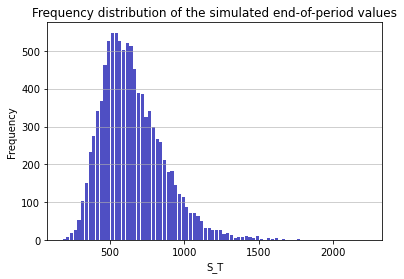

In [521]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-period values')

In [522]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))

European put 86.91105099725957


### Calculation of Greeks

### Delta

In [590]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [612]:
delta(641.90, 660.00, 1.0, 0.0134, 0, 0.3175, 'put')

-0.4548675586136911

In [602]:
S = np.linspace(300,750,20)
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Put [i] = delta(S[i], 660.00, 1.0, 0.0134, 0, 0.3175, 'put')

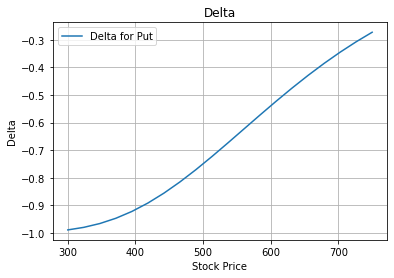

In [603]:
#2D figure
fig = plt.figure()
plt.plot(S, Delta_Put, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Put'])

### Surface of Delta 

In [584]:
S = np.linspace(300,750,20)
T = np.linspace(0.5, 2, 51)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)): 
        Delta[i,j] = delta(S[j], 660, T[i], 0.0134, 0, 0.3175, 'put')

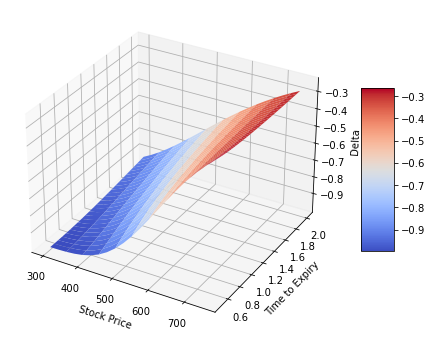

In [585]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

### Gamma 

In [586]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [611]:
gamma(641.90, 660.00, 1.0, 0.0134, 0, 0.3175, 'put')

0.0019449475274636674

In [604]:
S = np.linspace(300,900,11) 
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 660.00, 1.0, 0.0134, 0, 0.3175, 'put')

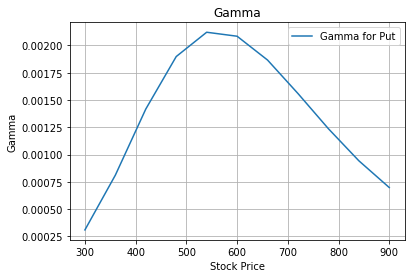

In [605]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Put'])

### Surface of Gamma 

In [607]:
S = np.linspace(300,900,11)
T = np.linspace(0.5, 2, 51)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 660, T[i], 0.0134, 0, 0.3175, 'put')

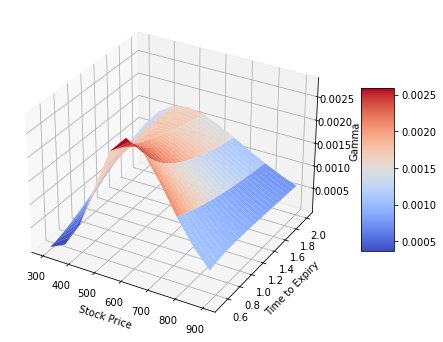

In [608]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5)

### Speed 

In [367]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [616]:
speed(641.90, 660.00, 1.0, 0.0134, 0, 0.3175, 'put')

-4.111930045495557e-06

In [609]:
S = np.linspace(300,750,20)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 660.00, 1.0, 0.0134, 0, 0.3175, 'put')

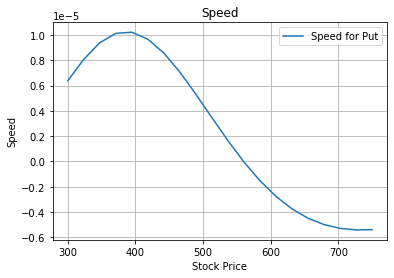

In [610]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Put'])

### Surface of Speed

In [614]:
S = np.linspace(300,750,20)
T = np.linspace(0.5, 2, 51)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)): 
        Speed[i,j] = speed(S[j], 660, T[i], 0.0134, 0, 0.3175, 'put')

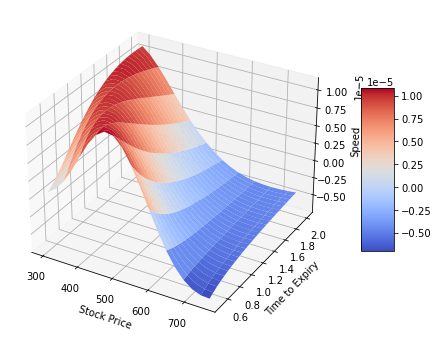

In [615]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5)

### Theta

In [617]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [620]:
theta(641.90, 660.00, 1.0, 0.0134, 0, 0.3175, 'put')

45.46130244849951

In [625]:
T = np.linspace(0.25,3,12)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Put [i] = theta(641.90, 660.00, T[i], 0.0134, 0, 0.3175, 'put')

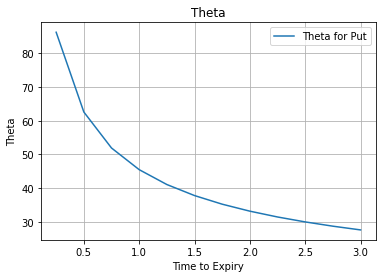

In [627]:
fig = plt.figure()
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Put'])

### Surface of Theta

In [656]:
S = np.linspace(100, 50, 51)
T = np.linspace(0.25,3,12)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)): 
        Theta[i,j] = theta(S[j], 660, T[i], 0.0134, 0, 0.3175, 'put')

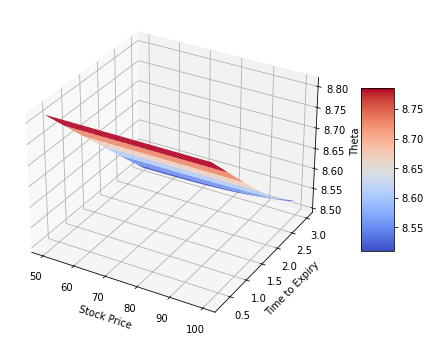

In [657]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5)

### Vega

In [664]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [665]:
vega(641.90, 660.00, 1.0, 0.0134, 0, 0.3175, 'put')

254.44057598463363

In [682]:
vol = np.linspace(0.1,0.3,25)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(641.90, 660.00, 1.0, 0.0134, 0, vol[i],'put')

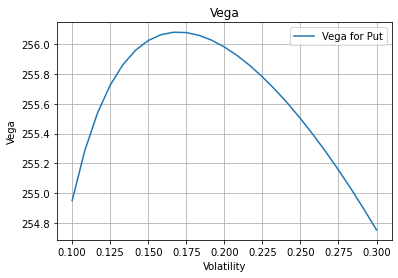

In [683]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Put'])

In [684]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)): 
        Vega[i,j] = vega(S[j], 660, T[i], 0.0134, 0, 0.3175, 'put')